# La siguinete implementación es un ejercicio en JULIA, utilizando los conceptos de las clases, impartidas en el curso de "Introducción a Julia" - Ph.D. in Physics OSCAR ALEJANDRO REULA - FAMAF - CONICET 


#  6.7 - Péndulo (Strogatz)

### Uno de los modelos simples abordados dentro de la materia fue la del péndulo, que está gobernada por la siguinete ecuación. En muchos textos se elude la NO LINEALIDAD del sistema medialte el siguiente artificio $\sin(\theta) \approx \theta $ 

### En ausencia de amortiguación y de fuerza externa, el movimiento del péndulo se rige por:


\begin{eqnarray}
 \dfrac{d^{2} \theta }{ dt^{2}} +  \dfrac{g}{L} \sin(\theta) &=& 0
\end{eqnarray}


In [23]:
using Images, ImageView
using TestImages

In [21]:
ruta = "/home/matasietephi/Documentos/PENDULO.png"

"/home/matasietephi/Documentos/PENDULO.png"

### Imagen del Péndulo

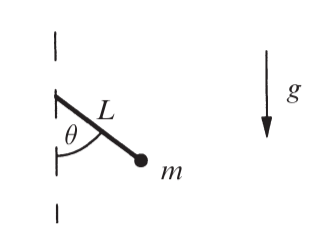

In [34]:
image = load(ruta)


### Donde $\theta$ es el ángulo desde la vertical descendente, $g$ es la asceleración de la gravedad  y $L$ es la longuitud del péndulo (como muestra la imagen)

### En la ecuación se introduce la frecuencia $\omega = \sqrt{ \frac{g}{L} }$ y la dimensionalida del tiempo está dada por $\tau = \omega t$

### Donde la ecuación queda determinada por:
\begin{eqnarray}
\ddot{\theta} + \sin(\theta) &=& 0
\end{eqnarray}

### Al realizar la derivación respecto de $\tau$. el correspondiente sistema de fases queda determinado por:

\begin{eqnarray}
\dot{\theta}&=& v \\
\dot{v}& =& - \sin(\theta)
\end{eqnarray}

In [24]:
# usando los paquetes de diferenciación
using OrdinaryDiffEq, Plots

In [26]:
# Constantes del problema del péndulo
const g = 9.81
L = 1.0

1.0

In [32]:
# Condiciones Iniciales del Problema 
s_0 = [0.0,π/2]
tspan = (0.0, 6.3)

(0.0, 6.3)

In [33]:
# Definición del Problema
function Pendulo(ds,s,p,t)
    θ = s[1]
    dθ = s[2]
    ds[1] = dθ            #define el sistema desacoplado
    ds[2] = -(g/L)*sin(θ) #define el sistema 
end

Pendulo (generic function with 1 method)

In [36]:
#Resolución del Problema
Planteo_Problema = ODEProblem(Pendulo,s_0,tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 6.3)
u0: 2-element Vector{Float64}:
 0.0
 1.5707963267948966

In [37]:
#Planteo del problema y el integrador numérico Runge-Kutta de orden 4 
Solucion = solve(Planteo_Problema,RK4()) 

retcode: Success
Interpolation: 3rd order Hermite
t: 65-element Vector{Float64}:
 0.0
 0.0006362147454811361
 0.006998362200292497
 0.02753216067878729
 0.0566176906369569
 0.09375858670202239
 0.1398729757493877
 0.1945172117907499
 0.2579309911127958
 0.329989289836604
 0.41070730984211967
 0.4988935620086876
 0.590260647321786
 ⋮
 5.08749348142834
 5.195517746537566
 5.301789658638336
 5.411052710020934
 5.523588765288305
 5.638985591436882
 5.74773017624726
 5.864139371347393
 5.978885163349261
 6.092514575965576
 6.201293671741853
 6.3
u: 65-element Vector{Vector{Float64}}:
 [0.0, 1.5707963267948966]
 [0.0009993631238779457, 1.5707932081482545]
 [0.010992121358329316, 1.5704189893030565]
 [0.04319383776618802, 1.5649604948179556]
 [0.08846962773551453, 1.5461789951984815]
 [0.14517011866503785, 1.5036702478578474]
 [0.21276672476144437, 1.4230170636798853]
 [0.28707151506628525, 1.2901523071414942]
 [0.36280480634279166, 1.0909784506753863]
 [0.4317962665229488, 0.8164437759736548

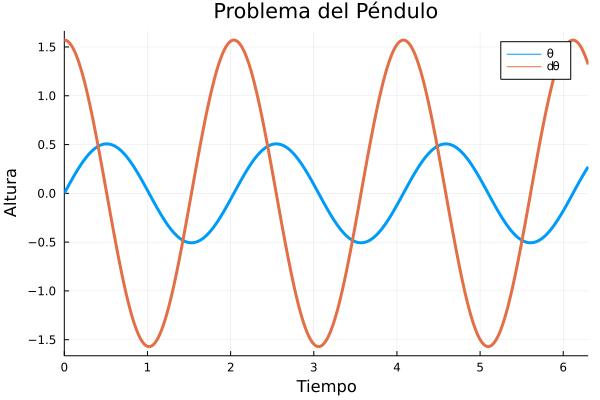

In [40]:
plot(Solucion,linewidth=3,title ="Problema del Péndulo", xaxis = "Tiempo", yaxis = "Altura", label = ["\\theta" "d\\theta"])

In [69]:
p = plot(Solucion,vars = (1,2), xlims = (-10,10), title = "Retrato de Fase", xaxis = "Velocidad", yaxis = "Posición", leg=false)
function phase_plot(Planteo_Problema, s_0, p, tspan=2pi)
    _prob = ODEProblem(Planteo_Problema.f,s_0,(0.0,tspan))
    sol = solve(_prob,RK4()) 
    plot!(p,Solucion,vars = (1,2), xlims = nothing, ylims = nothing)
end


phase_plot (generic function with 2 methods)

In [70]:
for i in -4pi:pi/2:4π
    for j in -4pi:pi/2:4π
        phase_plot(Planteo_Problema, [j,i], p)
    end
end

In [71]:
plot(p,xlims = (-10,10))
